<a href="https://colab.research.google.com/github/sidd2476/Face_recog_basic/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


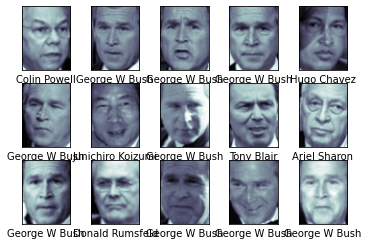

In [8]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(3,5)
for i , axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap = "bone")
  axi.set(xticks = [], yticks = [] , xlabel = faces.target_names[faces.target[i]])

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components = 150 ,svd_solver='randomized' , random_state=42, whiten = True)
svc = SVC(kernel = 'rbf' , class_weight = "balanced")
model = make_pipeline(pca , svc)

In [0]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(faces.data , faces.target , random_state = 42)
   

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid =  {'svc__C':[1,5,10,50],
            'svc__gamma':[0.0001 , 0.005,0.001,0.005]
            }

grid = GridSearchCV(model , param_grid)
%time grid.fit(xtrain , ytrain)
print(grid.best_params_)

CPU times: user 1min 11s, sys: 16.8 s, total: 1min 27s
Wall time: 55 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [0]:
model= grid.best_estimator_
yfit = model.predict(xtest)

Text(0.5, 0.98, 'Predicted Names; Incorredt LAbels in red ')

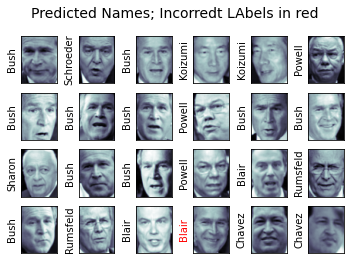

In [34]:
fig , ax = plt.subplots(4,6)
for i , axi in enumerate(ax.flat):
  axi.imshow(xtest[i].reshape(62,47) , cmap = "bone")
  axi.set(xticks = [], yticks = [])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorredt LAbels in red ' , size = 14)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(ytest , yfit,target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(91.68, 0.5, 'Predicted Label')

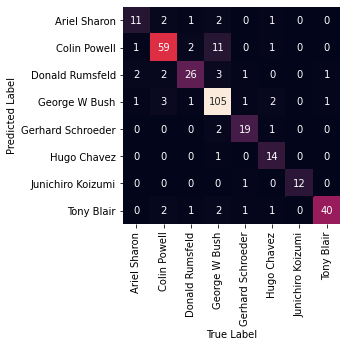

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T , square = True , annot = True , fmt='d', cbar= False,xticklabels=faces.target_names,yticklabels=faces.target_names)

plt.xlabel("True Label")
plt.ylabel("Predicted Label")